In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
c =0.299792458
n =1.3195
v=c/n 
print(v)

0.2272015596816976


In [8]:
info_d = []
info_s = []
data_d = []
data_s = []

for i in range(0,10):
    name_dd = "../data/Tau05to15PeV_00{0}_data.npy".format(i)
    name_di = "../data/Tau05to15PeV_00{0}_info.pkl".format(i)
    name_sd = "../data/Electron05to15PeV_00{0}_data.npy".format(i)
    name_si = "../data/Electron05to15PeV_00{0}_info.pkl".format(i)
    info_d_temp = pickle.load(open(name_di, "rb"))
    info_s_temp = pickle.load(open(name_si, "rb"))
    data_d_temp = np.load(name_dd ,allow_pickle=True,encoding='bytes')
    data_s_temp = np.load(name_sd ,allow_pickle=True,encoding='bytes')
    info_d = info_d + info_d_temp
    info_s = info_s + info_s_temp
    data_d.append(data_d_temp)    
    data_s.append(data_s_temp)
data_d = np.vstack(data_d)
data_s = np.vstack(data_s)
info_d = np.array(info_d)
info_s = np.array(info_s)

In [9]:
print(info_d.shape, data_d.shape)
print(info_s.shape, data_s.shape)
print(type(data_d_temp[0][0][0]))

(10062,) (10062, 300, 60)
(24019,) (24019, 300, 60)
<class 'numpy.float64'>


In [20]:
print(np.amax(data_d))
print(np.amin(data_d))
print(np.amax(data_s))
print(np.amin(data_s))

6.405907616717559e-09
-5.962297593924894e-11
6.883592770365534e-09
-6.128851422642174e-11


In [31]:
label_d = np.ones(len(data_d))
label_s = np.zeros(len(data_s))
print(label_d.shape)
print(label_s.shape)
print(label_d[0])
print(label_s[0])

(10062,)
(24019,)
1.0
0.0


(34081, 300, 60)
(34081,)
1.0


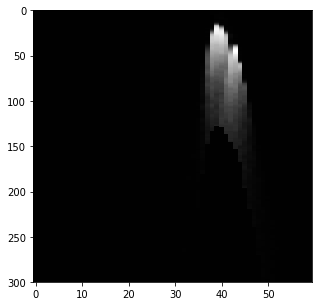

In [41]:
data = np.concatenate((data_d, data_s), axis = 0) 
label = np.concatenate((label_d, label_s), axis = 0) 
print(data.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'gray')
print(label.shape)
print(label[2])

In [33]:
from sklearn.utils import shuffle

(34081, 300, 60) (34081,)
0.0


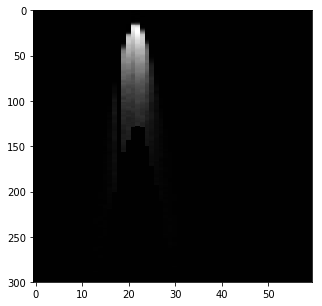

In [45]:
data, label = shuffle(data, label, random_state = 1)
print(data.shape, label.shape)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(data[2], interpolation='nearest', aspect='auto', cmap= 'gray')
print(label[2])

In [47]:
train_data = data[:26000]
train_label = label[:26000]
train_data = train_data.astype('float32')/10**-8

valid_data = data[26000:30000]
valid_label = label[26000:30000]
valid_data = valid_data.astype('float32')/10**-8

test_data = data[30000:]
test_label = label[30000:]
test_data = test_data.astype('float32')/10**-8

In [48]:
print(np.amax(train_data))
print(np.amin(train_data))

0.68835926
-0.006128852


In [10]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [6]:
#for im in data_d[:100]:
#    print(im.shape)
#    fig = plt.figure(figsize=(12, 12))
#    ax = fig.add_subplot(111)
#    ax.imshow(im, interpolation='nearest', aspect='auto', cmap= 'gray')
    #ax.plot(im[14,:])
    #print(im[:,46])

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(300, 60, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 296, 56, 32)       832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 148, 28, 32)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 26, 32)       9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 5, 64)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 11200)             0         
__________